# Step 1: Imports and Reading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

Column name 	Description
pickup	        The date and time the trip started.
dropoff	        The date and time the trip ended.
passengers	    The number of passengers for the trip.
distance	    The distance of the trip in miles.
fare	        The initial fare calculated by the meter.
tip	            The tip amount paid.
tolls	        The total amount of tolls paid.
total	        The total cost of the trip, including fare, tip, and tolls.
color	        The color of the taxi, either 'yellow' or 'green'.
payment	        The method of payment, such as 'credit card' or 'cash'.
pickup_zone	    The name of the taxi zone for the pickup location.
dropoff_zone	The name of the taxi zone for the drop-off location.
pickup_borough	The name of the borough for the pickup location.
dropoff_borough	The name of the borough for the drop-off location.

In [3]:
df = sns.load_dataset('taxis')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

# Step 2: Data Cleaning + Pre-Processing

In [5]:
sub = df.dropna()
# decided to experiment with dropping columns, to see if it was too many

In [23]:
sub.info()
# did not seem to drop many so I kept it

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   int8          
 9   payment          6341 non-null   int8          
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   int64         
 13  dropoff_borough  6341 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(3), i

In [17]:
borough_val = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']
borough_dum = [1, 2, 3, 4, 5]

In [18]:
sub['pickup_borough'] = sub['pickup_borough'].replace(to_replace= borough_val, value= borough_dum)
sub['dropoff_borough'] = sub['dropoff_borough'].replace(to_replace= borough_val, value= borough_dum)

# used the replace method to change strings to numbers
# assigned to variables, one with the actual values, and one with what I wanted to replace those values with
# saved changes that I made to that column

/tmp/ipykernel_7376/4116869997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sub['pickup_borough'] = sub['pickup_borough'].replace(to_replace= borough_val, value= borough_dum)
/tmp/ipykernel_7376/4116869997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pickup_borough'] = sub['pickup_borough'].replace(to_replace= borough_val, value= borough_dum)
/tmp/ipykernel_7376/4116869997.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [21]:
sub['color'] = pd.Categorical(sub['color'], categories = ['yellow', 'green'], ordered = True)
sub['payment'] = pd.Categorical(sub['payment'], categories= ['credit card', 'cash'], ordered = True)

/tmp/ipykernel_7376/1618385773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['color'] = pd.Categorical(sub['color'], categories = ['yellow', 'green'], ordered = True)
/tmp/ipykernel_7376/1618385773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['payment'] = pd.Categorical(sub['payment'], categories= ['credit card', 'cash'], ordered = True)


In [22]:
sub['color'] = sub['color'].cat.codes
sub['payment'] = sub['payment'].cat.codes

# used the categorical method for these two columns
# changes the string value types to categorical ones by using pd.Categorical
# used .cat.codes to change the categorical data types to numerical ones

/tmp/ipykernel_7376/4166387109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['color'] = sub['color'].cat.codes
/tmp/ipykernel_7376/4166387109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['payment'] = sub['payment'].cat.codes


In [24]:
sub_2 = sub.drop(columns = ['pickup_zone','dropoff_zone'], axis = 1)
# dropped tehse columns, cause using them for a flask app would be confusing

In [25]:
sub_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   int8          
 9   payment          6341 non-null   int8          
 10  pickup_borough   6341 non-null   int64         
 11  dropoff_borough  6341 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(3), int8(2)
memory usage: 557.3 KB


## Step 2B: Saving Clean Dataset

In [57]:
sub_2.to_pickle('data/cleaned_taxis_dataset')
# pickled the dataset as I wanted to keep the datetime objects as is (in case they were useful)

## Step 2C: Reading Cleaned Dataset

In [2]:
data = pd.read_pickle('data/cleaned_taxis_dataset')

In [3]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,0,0,1,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,0,1,1,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,0,0,1,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,0,0,1,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,0,0,1,1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   int8          
 9   payment          6341 non-null   int8          
 10  pickup_borough   6341 non-null   int64         
 11  dropoff_borough  6341 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(3), int8(2)
memory usage: 557.3 KB


# Step 3: EDA

In [25]:
sns.set_theme('paper')
sns.set_style('darkgrid')

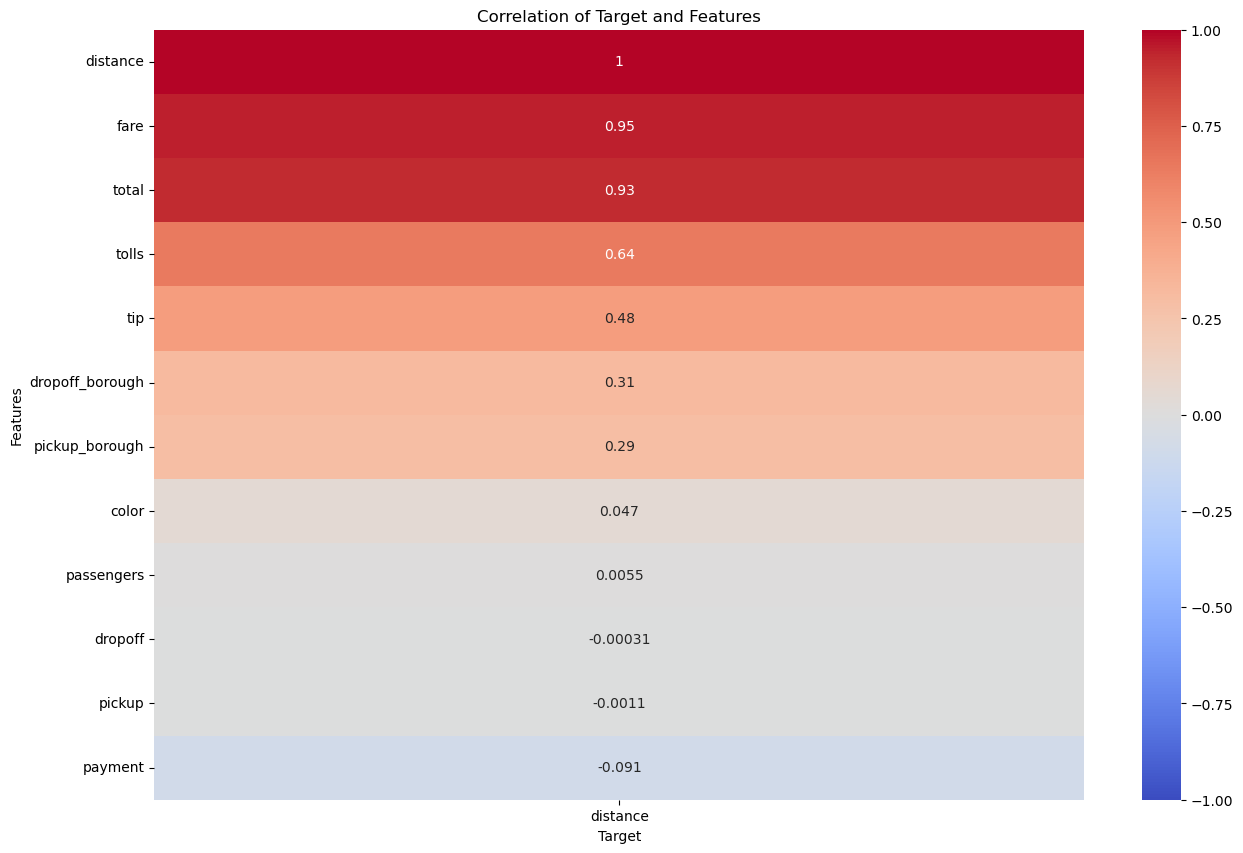

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr()[['distance']].sort_values(by = 'distance', ascending = False), 
           annot = True, 
           vmin = -1, 
           vmax = 1, 
           cmap = 'coolwarm')
plt.title('Correlation of Target and Features')
plt.xlabel('Target')
plt.ylabel('Features')
plt.savefig('visuals/heatmap.png')
# heatmap I used to find which features could be used to predict my target (I decided on distance)

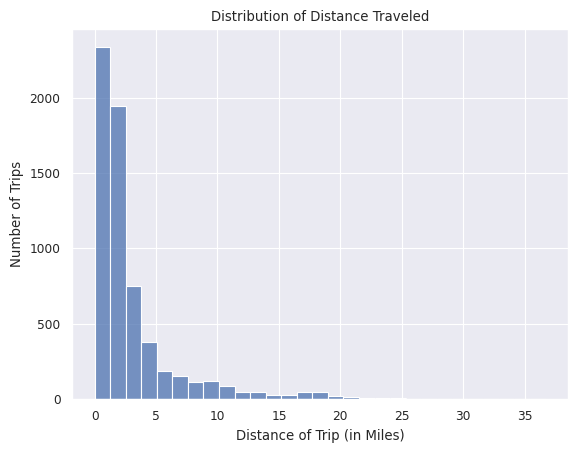

In [26]:
sns.histplot(data, 
            x = 'distance', 
            binwidth= 1.25)
plt.title('Distribution of Distance Traveled')
plt.xlabel('Distance of Trip (in Miles)')
plt.ylabel('Number of Trips')
plt.savefig('visuals/histogram.png')
# maded a histogram to show the distribution of the average trip distances, as that was my target

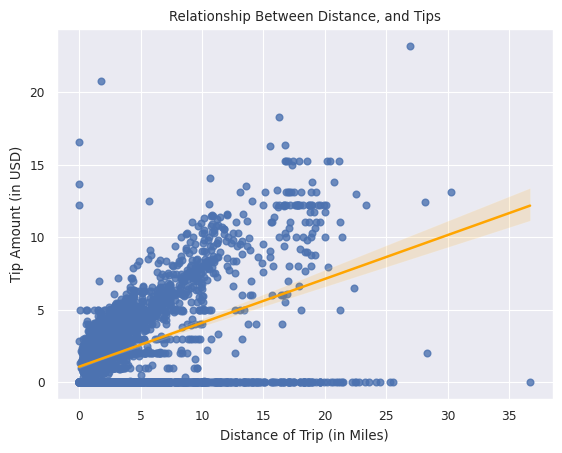

In [28]:
sns.regplot(data, x = 'distance', y = 'tip', line_kws={'color' : 'orange'})
plt.title('Relationship Between Distance, and Tips')
plt.xlabel('Distance of Trip (in Miles)')
plt.ylabel('Tip Amount (in USD)')
plt.savefig('visuals/regplot_tip.png')
# made a regplot to show one of the relationships between distance and trips. shows us that while there does seem to be some correlation, most people seem to be either to generous or to skimpy, heavily affecting the reg line

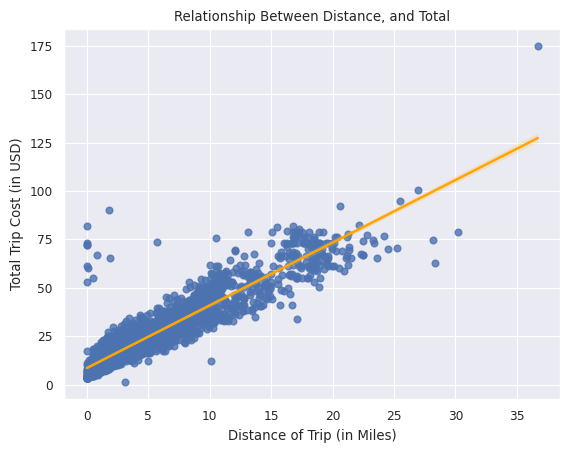

In [30]:
sns.regplot(data, x = 'distance', y = 'total', line_kws={'color' : 'orange'})
plt.title('Relationship Between Distance, and Total')
plt.xlabel('Distance of Trip (in Miles)')
plt.ylabel('Total Trip Cost (in USD)')
plt.savefig('visuals/regplot_total.png')
# reg plot showing the relationship between distance and total cost. much stronger relationship[, you could assume that an expensive taxi ride meant a lobger distance traveled

# Step 4: Modeling

In [4]:
X = data[['fare','tip','tolls','total']]

y = data['distance']

# features and target

## Linear Regression

In [85]:
scores = []

for i in range(10, 31, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

# for loop that scores many different testsizes for a linear regression problem. appends the eval metrics onto a empty list, and turns it intop a dataframe for easy viewing

In [86]:
# data frame in question
df_scores
# test size of 30 poercent seems to be the best

,test_size,train_score,test_score
0,10,0.913040,0.793225
1,11,0.913599,0.814258
2,12,0.913544,0.820020
3,13,0.913271,0.828077
4,14,0.912554,0.841651
5,15,0.912617,0.847129
6,16,0.912251,0.855502
7,17,0.911843,0.862039
8,18,0.911191,0.868452
9,19,0.910713,0.872877


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)
# making the lr model with the best test size

In [143]:
lr = LinearRegression()

In [144]:
lr.fit(X_train, y_train)
# fitting the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### LR R squared Score

In [145]:
lr.score(X_test, y_test)

0.8844685742337036

### LR RMSE Score vs Baseline

In [146]:
y_preds = lr.predict(X_test)
root_mean_squared_error(y_test, y_preds)
# ecaluating the rmse, this one did well

1.2659451815034048

In [147]:
baseline_preds = np.full_like(y_test, y_test.mean())
root_mean_squared_error(y_test, baseline_preds)

3.7244730285201353

## Lasso

In [88]:
scores = []

for i in range(10, 31, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    las = Lasso()
    las.fit(X_train, y_train)
    train_score = las.score(X_train, y_train)
    test_score = las.score(X_test, y_test)

    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [89]:
df_scores
# test size of 30 percet is also the berst for this one

,test_size,train_score,test_score
0,10,0.907689,0.784964
1,11,0.908785,0.800961
2,12,0.908764,0.807076
3,13,0.908483,0.815777
4,14,0.907794,0.829569
5,15,0.907840,0.834969
6,16,0.907335,0.844436
7,17,0.906852,0.851670
8,18,0.906185,0.858514
9,19,0.905810,0.862680


## Random Forest Regressor

In [90]:
scores = []

for i in range(10, 31, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    rfr = RandomForestRegressor(random_state= 42)
    rfr.fit(X_train, y_train)
    train_score = rfr.score(X_train, y_train)
    test_score = rfr.score(X_test, y_test)
    
    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [91]:
df_scores
# test size 30 strikes again

,test_size,train_score,test_score
0,10,0.967724,0.738695
1,11,0.967579,0.779698
2,12,0.968026,0.789116
3,13,0.967561,0.792035
4,14,0.966662,0.811466
5,15,0.967262,0.824353
6,16,0.966648,0.830845
7,17,0.965733,0.841144
8,18,0.966327,0.848615
9,19,0.966849,0.852516


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [136]:
rfr = RandomForestRegressor(random_state= 42)

In [137]:
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### RFR r squared

In [138]:
rfr.score(X_test, y_test)

0.8822916232007615

### RFR RMSE vs Baseline

In [140]:
y_preds = rfr.predict(X_test)
root_mean_squared_error(y_test, y_preds)

1.2778165802567063

In [141]:
baseline_preds = np.full_like(y_test, y_test.mean())
root_mean_squared_error(y_test, baseline_preds)

3.7244730285201353

## Decission Tree

In [92]:
scores = []

for i in range(10, 31, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    dtr = DecisionTreeRegressor(random_state = 42)
    dtr.fit(X_train, y_train)
    train_score = dtr.score(X_train, y_train)
    test_score = dtr.score(X_test, y_test)
    
    scores.append({'test_size': i, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)


In [93]:
df_scores
# test size 27

,test_size,train_score,test_score
0,10,0.976348,0.689298
1,11,0.976328,0.726807
2,12,0.976241,0.735644
3,13,0.976182,0.750587
4,14,0.976065,0.768588
5,15,0.975867,0.781722
6,16,0.975680,0.797524
7,17,0.975474,0.800479
8,18,0.975307,0.814235
9,19,0.975153,0.840887


## KNearest Regressor

In [5]:
def model_factory(model, columns):
    """
    Creator: Daniel
    inputs: 
        model: The machine learning model object to use in the pipeline
        columns: the list of columns to use for scaling
    outputs:
        returns the model, ready to be fitted and used. 
    """
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columns)
        ],
        remainder='passthrough'
    )
    # this preprocessor will scale the columns passed in. Any other columns will go through without being scaled. 
    model = Pipeline(
        steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ]
    )
    # this is the pipeline the model will use, so it will first scale it with the preprocessor, then run it through the model. 
    # this will make it easier to use, as it will scale the inputs automatically, so it doesn't need to be scaled
    # outside of the model. 
    return model

# function creates a pipline that automatically scales values for you

In [114]:
scores = []

for k in range(3, 32, 2):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [115]:
df_scores
# k of 19

,k,train_score,test_score
0,3,0.935249,0.881485
1,5,0.928574,0.884502
2,7,0.924866,0.887205
3,9,0.922004,0.884628
4,11,0.920321,0.885067
5,13,0.919888,0.887213
6,15,0.918269,0.888918
7,17,0.917270,0.888637
8,19,0.916200,0.889587
9,21,0.915782,0.889526


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.30)

In [31]:
X.columns

Index(['fare', 'tip', 'tolls', 'total'], dtype='object')

In [8]:
knn = model_factory(KNeighborsRegressor(n_neighbors = 19), X.columns)
# filling the model_factory parameters with the model that performed well and the index of the columns (the column names)

In [9]:
knn.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### KNN R Squared Score

In [10]:
knn.score(X_test, y_test)

0.8895865340309712

### KNN RMSE vs baseline

In [11]:
y_preds = knn.predict(X_test)

In [12]:
root_mean_squared_error(y_test, y_preds)

1.2375873314755996

In [13]:
baseline_preds = np.full_like(y_test, y_test.mean())
root_mean_squared_error(y_test, baseline_preds)

3.7244730285201353

### Pickling KNN
> Decided on this oneas it had good eval metrics, plus I should use the knowledge I obtained on making a pipeline to handle scaling for me 

In [14]:
knn_pkl = ''

In [15]:
with open('knn_pkl', 'wb') as file:
    model = pickle.dump(knn, file)

In [16]:
with open('knn_pkl', 'rb') as file:
    model = pickle.load(file)